In [1]:
import utils as utils
import clustering as clustering
import thresholdedCosineSpectralClustering as tcsc
import greedySubspaceProjectionClustering as gspc
import numpy as np

import simulations_synthetic as simulations

==============
# FIGURE 1 (HOMOGENEOUS INTERACTIONS)
=============== 

In [2]:
scenario = 'homo-uniform-one'

n = 900
n_clusters = 3
sizes = [ n//n_clusters for dummy in range( n_clusters ) ]
edge_density = 0.05
nAverage = 15

algorithms = ['sbm', 'dcbm', 'pabm', 'osc', 'sklearn', 'tcsc', 'r-tcsc', 'gspc' ]

==============
# FIGURE 1a (VARYING c)
=============== 

In [3]:
xi = 1
#c_range = [ 0,0.2,0.4,0.6,0.8,1 ]
c_range = np.linspace( 0, 1, 11 )

results_mean_c, results_std_c = simulations.runScenario_c( algorithms, scenario, n, sizes, edge_density, xi, c_range, nAverage = nAverage, metric = 'accuracy' )
results_ste_c = simulations.results_std_to_ste( results_std_c, nAverage )

100%|██████████| 11/11 [08:42<00:00, 47.53s/it]


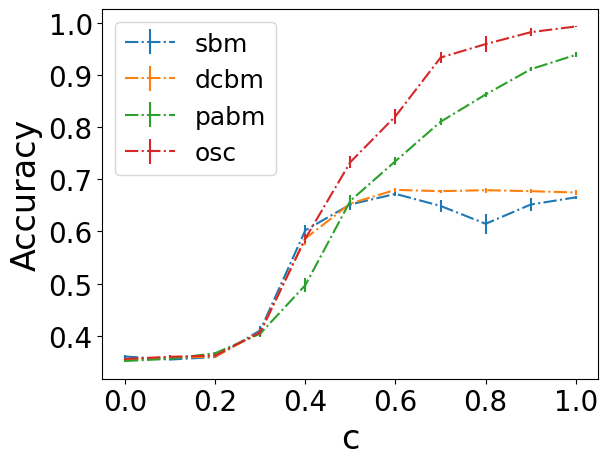

In [4]:
fileName = str(scenario) + '_c_n_' + str( n ) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_xi_' + str(xi) + '_nAverage_' + str(nAverage) + '.pdf'
simulations.plotFigure( c_range, results_mean_c, accuracy_err = results_ste_c, 
                       methods = [ 'sbm', 'dcbm', 'pabm', 'osc'], 
               xticks = None, yticks = None,
               xlabel = "c", ylabel = "Accuracy",
               savefig = True, fileName = fileName )

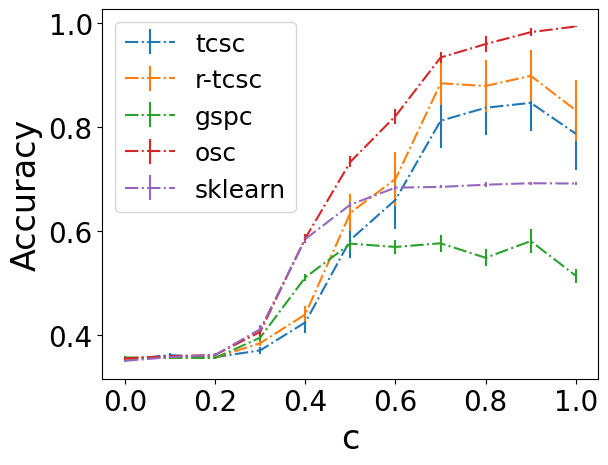

In [5]:
fileName = str(scenario) + '_c_n_' + str( n ) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_xi_' + str(xi) + '_nAverage_' + str(nAverage) + '_pabm_algos.pdf'
simulations.plotFigure( c_range, results_mean_c, accuracy_err = results_ste_c, 
                       methods = ['tcsc', 'r-tcsc', 'gspc', 'osc', 'sklearn'], 
               xticks = None, yticks = [0.4,0.6,0.8,1],
               xlabel = "c", ylabel = "Accuracy",
               savefig = True, fileName = fileName )

==============
# FIGURE 1b (VARYING COMMUNITY SEPARATION XI)
=============== 

In [6]:
#xi_range = [ 0, 0.2, 0.4, 0.6, 0.8, 1 ]
xi_range = np.linspace( 0, 1, 11 )
xi_range[0] = 0.01  # Avoid xi=0, which leads to disconnected graphs (and raise errors for sklearn). This does not change the results, as xi=0.01 and xi=0 gives the same accuracy for all algorithms.
c = 0.8

results_mean_xi, results_std_xi = simulations.runScenario_xi( algorithms, scenario, n, sizes, edge_density, xi_range, c, nAverage = nAverage, metric = 'accuracy' , homogeneous = True )
results_ste_xi = simulations.results_std_to_ste( results_std_xi, nAverage )

100%|██████████| 11/11 [08:40<00:00, 47.34s/it]


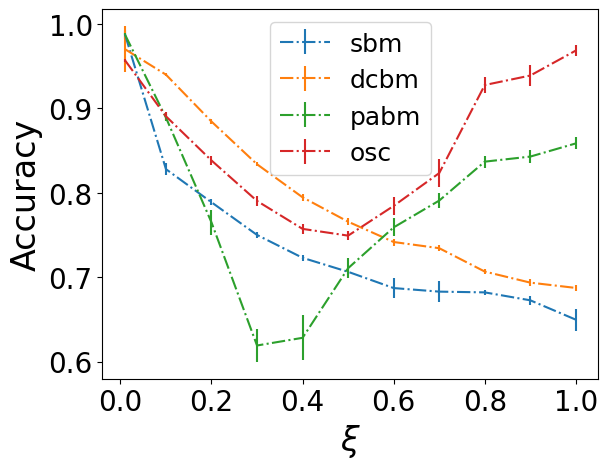

In [7]:
fileName = str(scenario) + '_xi_n_' + str(n) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_nAverage_' + str(nAverage) + '.pdf'
simulations.plotFigure( xi_range, results_mean_xi, accuracy_err = results_ste_xi, methods = [ 'sbm', 'dcbm', 'pabm', 'osc'], 
               xticks = None, yticks = [0.6,0.7,0.8,0.9,1],
               xlabel = r"$\xi$", ylabel = "Accuracy",
               savefig = True, fileName = fileName )

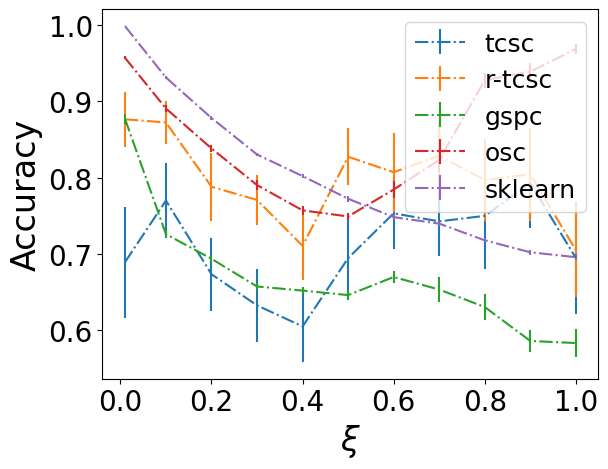

In [9]:
fileName = str(scenario) + '_xi_n_' + str(n) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_nAverage_' + str(nAverage) + '_pabm_algos.pdf'
simulations.plotFigure( xi_range, results_mean_xi, accuracy_err = results_ste_xi, 
                       methods = ['tcsc', 'r-tcsc', 'gspc', 'osc', 'sklearn'], 
               xticks = None, yticks = [0.6,0.7,0.8,0.9,1],
               xlabel = r"$\xi$", ylabel = "Accuracy",
               savefig = True, fileName = fileName )

==============
# FIGURE 2 (VARYING EMBEDDING DIMENSION)
=============== 

In [44]:
n = 900
n_clusters = 3
sizes = [ n//n_clusters for dummy in range( n_clusters ) ]
edge_density = 0.05
xi = 1
nAverage = 15

extra_parameter = [1]  
#This correspond to the parameter(s) for the distribution used
#e.g., the c for uniform, the exponent for Pareto, etc. 


In [12]:
scenario_1 = 'homo-uniform-one' 
#choices: homo-uniform-one, homo-uniform-uniform, hetero-pareto
P = simulations.generate_P_for_different_scenarios( scenario, sizes, edge_density, xi, extra_parameter )

results_mean_embdim, results_std_embdim = simulations.varying_embedding_dimension( n, sizes, P, nAverage = nAverage,
                                                                                  algorithms = [ 'sbm', 'dcbm', 'pabm', 'osc', 'sklearn', 'tcsc', 'r-tcsc' ] )
results_ste_embdim = simulations.results_std_to_ste( results_std_embdim, nAverage )

100%|██████████| 10/10 [10:41<00:00, 64.19s/it]


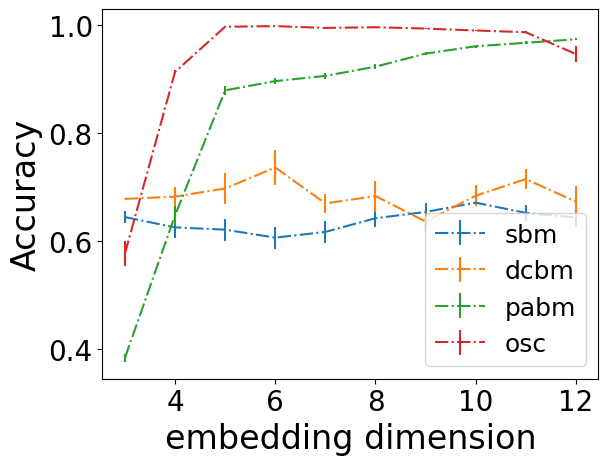

In [16]:
fileName = 'embeddingDimension_' + str(scenario_1) + '_n_' + str(n) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_nAverage_' + str(nAverage) + '.pdf'
simulations.plotFigure( range( n_clusters, n_clusters**2+1 + n_clusters ), results_mean_embdim, accuracy_err = results_ste_embdim, methods = [ 'sbm', 'dcbm', 'pabm', 'osc' ], 
               xticks = None, yticks = [0.4,0.6,0.8,1],
               xlabel = 'embedding dimension', ylabel = "Accuracy",
               savefig = True, fileName = fileName )


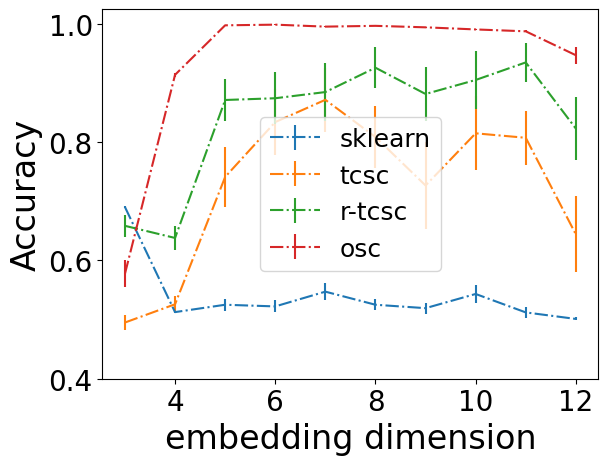

In [17]:
fileName = 'embeddingDimension_' + str(scenario_1) + '_n_' + str(n) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_nAverage_' + str(nAverage) + '_pabm_algos.pdf'
simulations.plotFigure( range( n_clusters, n_clusters**2+1 + n_clusters ), results_mean_embdim, accuracy_err = results_ste_embdim, methods = [ 'sklearn', 'tcsc', 'r-tcsc', 'osc' ], 
               xticks = None, yticks = [0.4,0.6,0.8,1],
               xlabel = 'embedding dimension', ylabel = "Accuracy",
               savefig = True, fileName = fileName )

In [18]:
scenario_2 = 'homo-uniform-uniform' 
P = simulations.generate_P_for_different_scenarios( scenario, sizes, edge_density, xi, extra_parameter )

results_mean_embdim_u, results_std_embdim_u = simulations.varying_embedding_dimension( n, sizes, P, nAverage = nAverage,
                                                                                      algorithms = [ 'sbm', 'dcbm', 'pabm', 'osc', 'sklearn', 'tcsc', 'r-tcsc' ] )
results_ste_embdim_u = simulations.results_std_to_ste( results_std_embdim_u, nAverage )

100%|██████████| 10/10 [18:22<00:00, 110.21s/it]


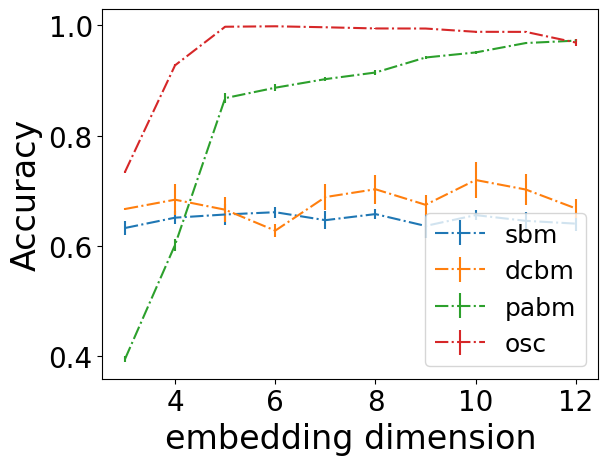

In [19]:
fileName = 'embeddingDimension_' + str(scenario_2) + '_n_' + str(n) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_nAverage_' + str(nAverage) + '.pdf'
simulations.plotFigure( range( n_clusters, n_clusters**2+1 + n_clusters ), results_mean_embdim_u, accuracy_err = results_ste_embdim_u, methods = [ 'sbm', 'dcbm', 'pabm', 'osc' ], 
               xticks = None, yticks = [0.4,0.6,0.8,1],
               xlabel = 'embedding dimension', ylabel = "Accuracy",
               savefig = True, fileName = fileName )

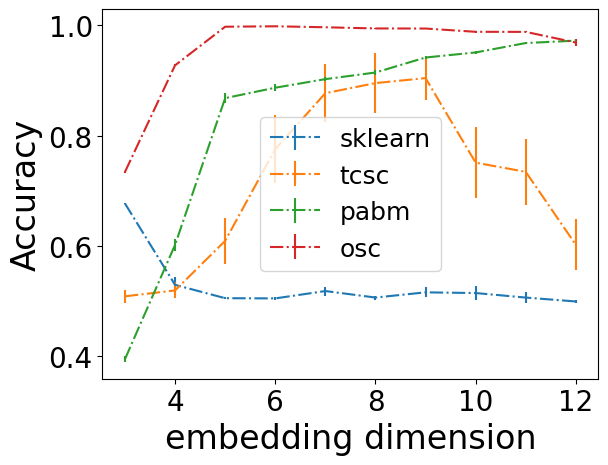

In [46]:
fileName = 'embeddingDimension_' + str(scenario_2) + '_n_' + str(n) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_nAverage_' + str(nAverage) + '_pabm_algos.pdf'
simulations.plotFigure( range( n_clusters, n_clusters**2+1 + n_clusters ), results_mean_embdim_u, accuracy_err = results_ste_embdim_u, methods = [ 'sklearn', 'tcsc', 'pabm', 'osc' ], 
               xticks = None, yticks = [0.4,0.6,0.8,1],
               xlabel = 'embedding dimension', ylabel = "Accuracy",
               savefig = True, fileName = fileName )


==============
# FIGURE 5 (INHOMOGENEOUS SCENARIOS)
==============

In [29]:
n = 2000
n_clusters = 5
sizes = [ n//n_clusters for dummy in range( n_clusters ) ]
edge_density = 0.02
xi = 1
nAverage = 10

algorithms = ['sbm', 'dcbm', 'pabm', 'osc', 'sklearn', 'tcsc', 'gspc' ]

In [30]:
# pareto 
alpha_range = [ 0.5, 1, 1.5, 2, 2.5, 3.0] #parameter range for the Pareto distribution
results_mean_pareto, results_std_pareto = simulations.runScenario_c( algorithms, 'pareto', n, sizes, edge_density, xi, alpha_range, nAverage = nAverage, metric = 'accuracy', homogeneous = False )
results_ste_pareto = simulations.results_std_to_ste( results_std_pareto, nAverage )

  0%|          | 0/6 [00:00<?, ?it/s]/opt/anaconda3/envs/pabm/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/opt/anaconda3/envs/pabm/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/opt/anaconda3/envs/pabm/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/opt/anaconda3/envs/pabm/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/Users/drev

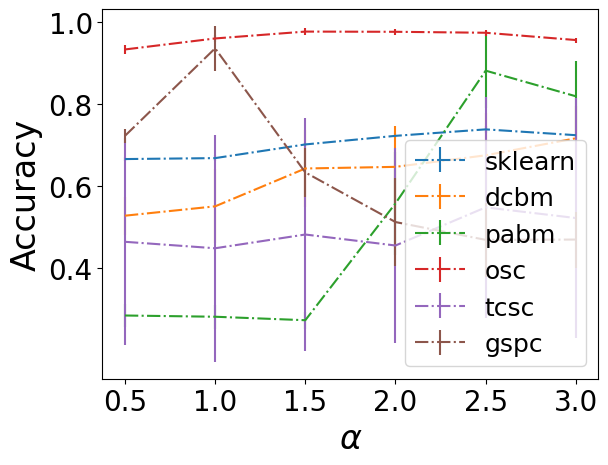

In [42]:
fileName = 'hetero_pareto_n_' + str( n ) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_xi_' + str(xi) + '_nAverage' + str(nAverage) + '.pdf'
simulations.plotFigure( alpha_range, results_mean_pareto, accuracy_err = results_std_pareto, 
                       methods = [ 'sklearn', 'dcbm', 'pabm', 'osc', 'tcsc', 'gspc'], 
               xticks = alpha_range, yticks = [0.4,0.6,0.8,1],
               xlabel = r'$\alpha$', ylabel = "Accuracy",
               savefig = True, fileName = fileName )


In [31]:
## exponential
lambda_range = [ 0.5, 1, 1.5, 2, 2.5] #parameter range for the Exponential distribution
results_mean_exponential, results_std_exponential = simulations.runScenario_c( algorithms, 'exponential', n, sizes, edge_density, xi, lambda_range, nAverage = nAverage, metric = 'accuracy', homogeneous = False )
results_ste_exponential = simulations.results_std_to_ste( results_std_exponential, nAverage )

100%|██████████| 5/5 [14:33<00:00, 174.79s/it]


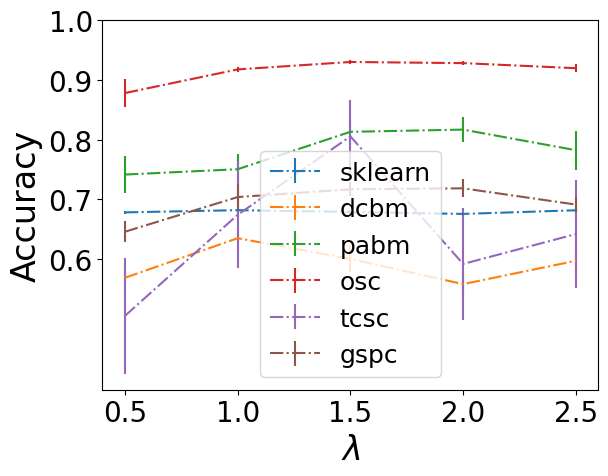

In [41]:
results_ste_exponential = simulations.results_std_to_ste( results_std_exponential, nAverage )
fileName = 'hetero_exponential_n_' + str( n ) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_xi_' + str(xi) + '_nAverage' + str(nAverage) + '.pdf'
simulations.plotFigure( lambda_range, results_mean_exponential, accuracy_err = results_ste_exponential, methods = [ 'sklearn', 'dcbm', 'pabm', 'osc', 'tcsc', 'gspc'], 
               xticks = [0.5, 1, 1.5, 2, 2.5], yticks = [0.6,0.7,0.8,0.9,1],
               xlabel = r'$\lambda$', ylabel = "Accuracy",
               savefig = True, fileName = fileName )

In [35]:
#scenario = 'lognormal' #choices: pareto, exponential, lognormal
sigma_range = [ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19] #parameter range for the Lognormal distribution
results_mean_lognormal, results_std_lognormal = simulations.runScenario_c( algorithms, 'lognormal', n, sizes, edge_density, xi, sigma_range, nAverage = nAverage, metric = 'accuracy', homogeneous = False )
results_ste_lognormal = simulations.results_std_to_ste( results_std_lognormal, nAverage )

 10%|█         | 1/10 [02:32<22:49, 152.20s/it]/opt/anaconda3/envs/pabm/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/opt/anaconda3/envs/pabm/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/opt/anaconda3/envs/pabm/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/opt/anaconda3/envs/pabm/lib/python3.13/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/

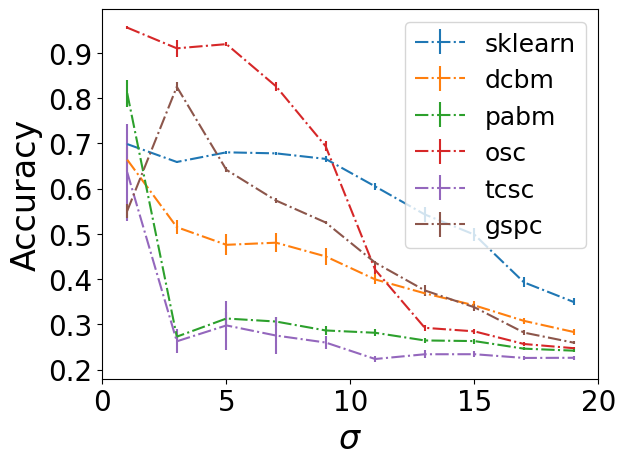

In [ ]:
fileName = 'hetero_lognormal_n_' + str( n ) + '_k_' + str(n_clusters) + '_density_' + str(edge_density) + '_xi_' + str(xi) + '_nAverage' + str(nAverage) + '.pdf'
simulations.plotFigure( sigma_range, results_mean_lognormal, accuracy_err = results_ste_lognormal, methods = [ 'sklearn', 'dcbm', 'pabm', 'osc', 'tcsc', 'gspc'], 
               xticks = [0,5,10,15,20], yticks = None,
               xlabel = r'$\sigma$', ylabel = "Accuracy",
               savefig = True, fileName = fileName )